In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### original data-set

In [7]:
data = pd.read_csv("/home/jishnu/Desktop/data analytics/EDA/original - data_sets/retail_store_sales.csv")

### data-set copy

In [8]:
df = data.copy()

In [9]:
df.shape

(12575, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


In [11]:
df.describe()

,Price Per Unit,Quantity,Total Spent
count,11966.000000,11971.000000,11971.000000
mean,23.365912,5.536380,129.652577
std,10.743519,2.857883,94.750697
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,51.000000
50%,23.000000,6.000000,108.500000
75%,33.500000,8.000000,192.000000
max,41.000000,10.000000,410.000000


In [13]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [12]:
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

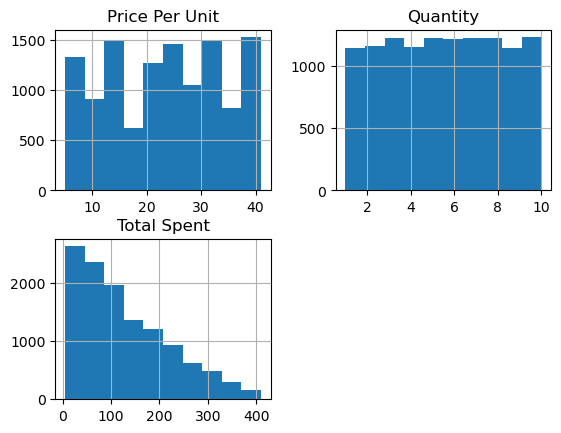

In [17]:
col1  = ["Price Per Unit","Quantity","Total Spent"] # numerical
col2 = ["Item","Discount Applied"] # catagorical

df[col1].hist()
plt.show()

In [18]:
for i in df[col1]:
    df[i] = df[i].fillna(df[i].median()) # numerical filling

In [21]:
for i in df[col2]:
    df[i] = df[i].fillna(df[i].mode()[0]).infer_objects(copy=False) # catagorical filling

In [24]:
df.isnull().sum()

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64

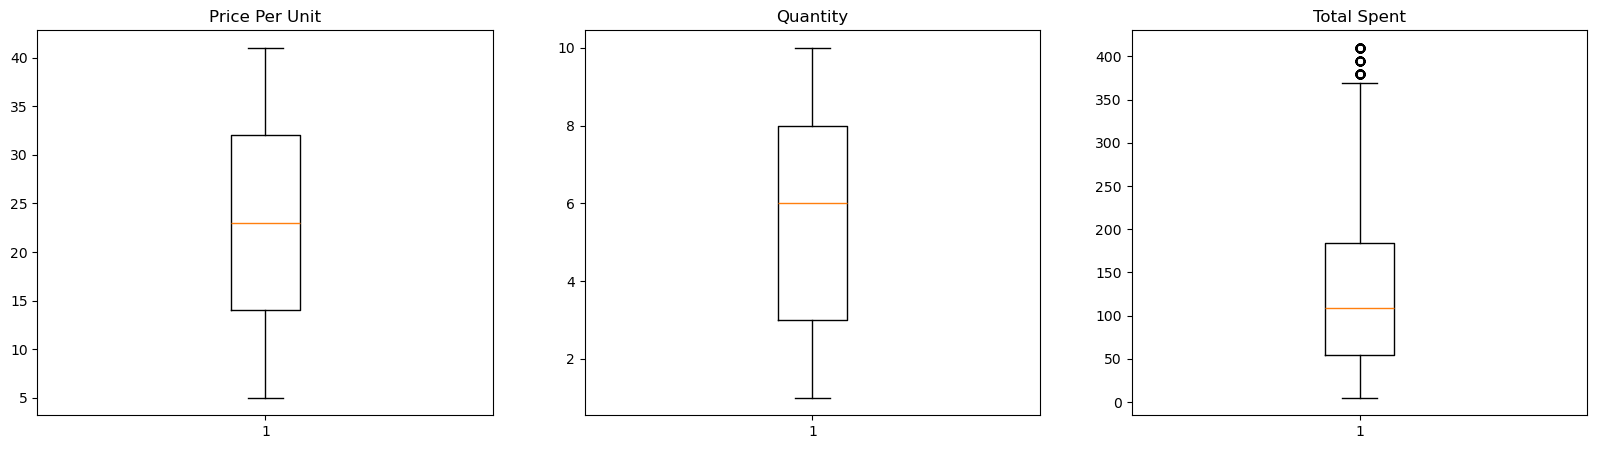

In [26]:
fig,axs = plt.subplots(1,3,figsize = (20,5))
titles = ["Price Per Unit","Quantity","Total Spent"]
for i in range(3):
    axs[i].boxplot(df[col1[i]])
    axs[i].set_title(titles[i])
plt.show()

In [32]:
Q1 = np.percentile(df["Total Spent"],25,method = "midpoint")
Q3 = np.percentile(df["Total Spent"],75,method = "midpoint")

IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 -1.5 * IQR

outlier = df[(df["Total Spent"] > upper) | (df["Total Spent"] < lower)]
outlier_list = outlier["Total Spent"].tolist()
outlier_list

Index([   27,   120,   129,   133,   135,   146,   339,   485,   668,   869,
       ...
       11940, 12041, 12176, 12189, 12192, 12209, 12216, 12243, 12542, 12557],
      dtype='int64', length=157)

In [33]:
df= df[(df["Total Spent"] >= lower) & (df["Total Spent"] <= upper)] #removes the outlier

In [35]:
outlier = df[(df["Total Spent"] > upper) | (df["Total Spent"] < lower)]["Total Spent"].tolist()
outlier

[]

In [36]:
df.isnull().sum()

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64

In [41]:
df.reset_index(drop = True , inplace = True)

In [42]:
df

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,True
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False
...,...,...,...,...,...,...,...,...,...,...,...
12413,TXN_9347481,CUST_18,Patisserie,Item_23_PAT,38.0,4.0,152.0,Credit Card,In-store,2023-09-03,True
12414,TXN_4009414,CUST_03,Beverages,Item_2_BEV,6.5,9.0,58.5,Cash,Online,2022-08-12,False
12415,TXN_5306010,CUST_11,Butchers,Item_7_BUT,14.0,10.0,140.0,Cash,Online,2024-08-24,True
12416,TXN_5167298,CUST_04,Furniture,Item_7_FUR,14.0,6.0,84.0,Cash,Online,2023-12-30,True


In [43]:
Q1 = np.percentile(df["Quantity"],25,method = "midpoint")
Q3 = np.percentile(df["Quantity"],75,method = "midpoint")

IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 -1.5 * IQR

outlier = df[(df["Quantity"] > upper) | (df["Quantity"] < lower)]
outlier_list = outlier["Quantity"].tolist()
outlier_list

[]

In [52]:
Q1 = np.percentile(df["Price Per Unit"],25,method = "midpoint")
Q3 = np.percentile(df["Price Per Unit"],75,method = "midpoint")

IQR = Q3 - Q1
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

outlier = []

for i in df["Price Per Unit"]:
    if((i > upper) or (i < lower)):
        outlier.append(i)
outlier



[]

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12418 entries, 0 to 12417
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12418 non-null  object 
 1   Customer ID       12418 non-null  object 
 2   Category          12418 non-null  object 
 3   Item              12418 non-null  object 
 4   Price Per Unit    12418 non-null  float64
 5   Quantity          12418 non-null  float64
 6   Total Spent       12418 non-null  float64
 7   Payment Method    12418 non-null  object 
 8   Location          12418 non-null  object 
 9   Transaction Date  12418 non-null  object 
 10  Discount Applied  12418 non-null  bool   
dtypes: bool(1), float64(3), object(7)
memory usage: 982.4+ KB


In [54]:
df.describe()

,Price Per Unit,Quantity,Total Spent
count,12418.000000,12418.000000,12418.000000
mean,23.155701,5.502496,125.266549
std,10.394878,2.762402,88.109931
min,5.000000,1.000000,5.000000
25%,14.000000,3.000000,55.000000
50%,23.000000,6.000000,108.500000
75%,32.000000,8.000000,182.000000
max,41.000000,10.000000,369.000000


In [55]:
df.to_csv("cleaned_retail_sales.csv", index = False)